In [102]:
import pandas as pd
import numpy as np
from numpy import ndarray
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant
import time
import datetime
import itertools

In [127]:
df2012 = pd.read_csv("C:/Users/손호진/Desktop/양진이/해양환경측정망_2012_profile_chemical_unknown.csv", encoding = "euc-kr")
df2013 = pd.read_csv("C:/Users/손호진/Desktop/양진이/해양환경측정망_2013_profile_chemical_unknown.csv", encoding = "euc-kr")
df2014 = pd.read_csv("C:/Users/손호진/Desktop/양진이/해양환경측정망_2014_profile_chemical_unknown.csv", encoding = "euc-kr")
df2015 = pd.read_csv("C:/Users/손호진/Desktop/양진이/해양환경측정망_2015_profile_chemical_unknown.csv", encoding = "euc-kr")
df2016 = pd.read_csv("C:/Users/손호진/Desktop/양진이/해양환경측정망_2016_profile_chemical_unknown.csv", encoding = "euc-kr")
df2017 = pd.read_csv("C:/Users/손호진/Desktop/양진이/해양환경측정망_2017_profile_chemical_unknown.csv", encoding = "euc-kr")
df2018 = pd.read_csv("C:/Users/손호진/Desktop/양진이/해양환경측정망_2018_profile_chemical_unknown.csv", encoding = "euc-kr")
df2019 = pd.read_csv("C:/Users/손호진/Desktop/양진이/해양환경측정망_2019_profile_chemical_unknown.csv", encoding = "euc-kr")
df2020 = pd.read_csv("C:/Users/손호진/Desktop/양진이/해양환경측정망_2020_profile_chemical_unknown.csv", encoding = "euc-kr")

In [128]:
df2020.columns

Index(['//1.사업메타', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39'],
      dtype='object')

print(df2012.isnull().sum())
print(df2013.isnull().sum())
print(df2014.isnull().sum())
print(df2015.isnull().sum())
print(df2016.isnull().sum())
print(df2017.isnull().sum())
print(df2018.isnull().sum())
print(df2019.isnull().sum())
print(df2020.isnull().sum())

In [129]:
def preprocessing1(df) :
    
    colnames = []
    for i in range(len(df)) :
        if df["//1.사업메타"].iloc[i] == "project_name" : return1 = i
    
    df = df.iloc[return1:]
    df.reset_index(drop = True, inplace = True)
    
    for name in df.iloc[0] :
        
        colnames.append(name)
      
    df = df.iloc[1:]
    df.columns = colnames
    
    ## 표층 데이터만 추출
    df.drop(df.loc[df['수심(text)']=='저층'].index, inplace=True)
    df = df.reset_index(drop = True)
    
    ## 타입 변환
    df = df.astype({'규산염[μg/L]' : "float", '부유물질 농도[μg/L]' : "float", '수소이온농도[무단위]' : "float", '수온[℃]' : "float", "Longitude [degrees_east]" : "float",
               '아질산성질소[μg/L]' : "float", '암모니아성 질소[μg/L]' : "float", '염분[psu]' : "float", '용존무기질소[μg/L]' : "float", 
               '용존산소[mg/L]' : "float", '인산염인[μg/L]' : "float", '질산성질소[μg/L]' : "float", '총인[μg/L]' : "float", "Latitude [degrees_north]" : "float",
               '총질소[μg/L]' : "float", '클로로필-a[μg/L]' : "float", '투명도[m]' : "float", '화학적산소요구량[mg/L]' : "float", "yyyy-mm-dd hh:mm:ss" : "datetime64"})
    
    return df

In [130]:
def preprocessing2(df) :
    
    colnames = []
    for i in range(len(df)) :
        if df["//1.사업메타"].iloc[i] == "project_name" : return1 = i
    
    df = df.iloc[return1:]
    df.reset_index(drop = True, inplace = True)
    
    for name in df.iloc[0] :
        
        colnames.append(name)
      
    df = df.iloc[1:]
    df.columns = colnames
    
    ## 표층 데이터만 추출
    df.drop(df.loc[df['수심(m)']!='0'].index, inplace=True)
    df = df.reset_index(drop = True)
    
    ## 타입 변환
    df = df.astype({'규산염[μg/L]' : "float", '부유물질 농도[μg/L]' : "float", '수소이온농도[무단위]' : "float", '수온[℃]' : "float", "Longitude [degrees_east]" : "float",
               '아질산성질소[μg/L]' : "float", '암모니아성 질소[μg/L]' : "float", '염분[psu]' : "float", '용존무기질소[μg/L]' : "float", 
               '용존산소[mg/L]' : "float", '인산염인[μg/L]' : "float", '질산성질소[μg/L]' : "float", '총인[μg/L]' : "float", "Latitude [degrees_north]" : "float",
               '총질소[μg/L]' : "float", '클로로필-a[μg/L]' : "float", '투명도[m]' : "float", '화학적산소요구량[mg/L]' : "float", "yyyy-mm-dd hh:mm:ss" : "datetime64"})
    
    return df

In [131]:
def preprocessing3(df) :
    
    colnames = []
    for i in range(len(df)) :
        if df["//1.사업메타"].iloc[i] == "project_name" : return1 = i
    
    df = df.iloc[return1:]
    df.reset_index(drop = True, inplace = True)
    
    for name in df.iloc[0] :
        
        colnames.append(name)
      
    df = df.iloc[1:]
    df.columns = colnames
    
    ## 표층 데이터만 추출
    df.drop(df.loc[df['수심(m)']=='저층'].index, inplace=True)
    df = df.reset_index(drop = True)
    
    ## 타입 변환
    df = df.astype({'규산염[μg/L]' : "float", '부유물질 농도[μg/L]' : "float", '수소이온농도[무단위]' : "float", '수온[℃]' : "float", "Longitude [degrees_east]" : "float",
               '아질산성질소[μg/L]' : "float", '암모니아성 질소[μg/L]' : "float", '염분[psu]' : "float", '용존무기질소[μg/L]' : "float", 
               '용존산소[mg/L]' : "float", '인산염인[μg/L]' : "float", '질산성질소[μg/L]' : "float", '총인[μg/L]' : "float", "Latitude [degrees_north]" : "float",
               '총질소[μg/L]' : "float", '클로로필-a[μg/L]' : "float", '투명도[m]' : "float", '화학적산소요구량[mg/L]' : "float", "yyyy-mm-dd hh:mm:ss" : "datetime64"})
    
    return df

In [132]:
df2012 = preprocessing1(df2012)
df2013 = preprocessing1(df2013)
df2014 = preprocessing1(df2014)
df2015 = preprocessing1(df2015)
df2016 = preprocessing1(df2016)
df2017 = preprocessing2(df2017)
df2018 = preprocessing2(df2018)
df2019 = preprocessing2(df2019)
df2020 = preprocessing3(df2020)

In [133]:
common_columns = set(df2012.columns) & set(df2013.columns) & set(df2014.columns) & set(df2015.columns) & set(df2016.columns) & set(df2017.columns) & set(df2018.columns) & set(df2019.columns) & set(df2020.columns)

common_columns = ['Latitude [degrees_north]','Longitude [degrees_east]','project_name','station','yyyy-mm-dd hh:mm:ss', '규산염[μg/L]','부유물질 농도[μg/L]','수소이온농도[무단위]', '수심(text)','수온[℃]','아질산성질소[μg/L]','암모니아성 질소[μg/L]', '염분[psu]', '용존무기질소[μg/L]', '용존산소[mg/L]', '인산염인[μg/L]', '질산성질소[μg/L]', '총인[μg/L]', '총질소[μg/L]', '클로로필-a[μg/L]', '투명도[m]', '화학적산소요구량[mg/L]']

In [134]:
print(df2012.shape)
print(df2013.shape)
print(df2014.shape)
print(df2015.shape)
print(df2016.shape)
print(df2017.shape)
print(df2018.shape)
print(df2019.shape)
print(df2020.shape)

(1200, 40)
(1441, 40)
(1562, 40)
(1567, 40)
(1552, 40)
(1568, 40)
(1600, 40)
(1600, 40)
(1615, 40)


In [135]:
df2012

,project_name,station,yyyy-mm-dd hh:mm:ss,Longitude [degrees_east],Latitude [degrees_north],bot.depth[m],수심(m),수심(text),총질소[μg/L],tn_qc,...,투명도[m],tr_qc,용존무기질소[μg/L],disinon_qc,화학적산소요구량[mg/L],cheoxydem_qc,암모니아성 질소[μg/L],amn_qc,총인[μg/L],totp_qc
0,해양환경측정망,가로림연안1_연안,2012-02-28,126.326944,36.946389,0,0,표층,237.2,2,...,0.7,2,170.6,2,0.92,2,18.1,2,21.5,2
1,해양환경측정망,가로림연안1_연안,2012-05-11,126.326944,36.946389,0,0,표층,199.2,2,...,2.1,2,35.3,2,2.32,2,11.8,2,15.4,2
2,해양환경측정망,가로림연안1_연안,2012-08-24,126.326944,36.946389,0,0,표층,286.0,2,...,1.0,2,154.7,2,1.68,2,65.9,2,33.9,2
3,해양환경측정망,가로림연안1_연안,2012-11-07,126.326944,36.946389,0,0,표층,272.3,2,...,2.1,2,172.5,2,1.46,2,9.5,2,28.7,2
4,해양환경측정망,가로림연안2_연안,2012-02-28,126.313333,36.990000,0,0,표층,338.2,2,...,0.7,2,227.9,2,0.95,2,8.0,2,47.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,해양환경측정망,후포연안2_연안,2012-02-12,129.483611,36.694444,0,0,표층,215.2,2,...,11.0,2,81.7,2,0.35,2,2.6,2,18.6,2
1196,해양환경측정망,후포연안2_연안,2012-05-08,129.483611,36.694444,0,0,표층,187.9,2,...,9.0,2,12.4,2,0.72,2,5.6,2,13.5,2
1197,해양환경측정망,후포연안2_연안,2012-08-10,129.483611,36.694444,0,0,표층,114.9,2,...,10.0,2,25.0,2,0.98,2,3.6,2,14.5,2
1198,해양환경측정망,후포연안2_연안,2012-11-22,129.483611,36.694444,0,0,표층,164.3,2,...,10.0,2,44.8,2,0.14,2,0.6,2,11.8,2


In [136]:
df2018

,project_name,station,yyyy-mm-dd hh:mm:ss,Longitude [degrees_east],Latitude [degrees_north],bot.depth[m],수심(m),수심(text),총질소[μg/L],tn_qc,...,투명도[m],tr_qc,용존무기질소[μg/L],disinon_qc,화학적산소요구량[mg/L],cheoxydem_qc,암모니아성 질소[μg/L],amn_qc,총인[μg/L],totp_qc
0,해양환경측정망,가로림연안1_연안,2018-02-08 15:26:00,126.326944,36.946389,0,0,0,265.0,2,...,1.6,2,167.4,2,1.59,2,4.2,2,30.0,2
1,해양환경측정망,가로림연안1_연안,2018-05-15 00:00:00,126.326944,36.946389,0,0,0,242.1,2,...,1.1,2,105.1,2,2.40,2,11.6,2,25.4,2
2,해양환경측정망,가로림연안1_연안,2018-08-13 11:05:00,126.326944,36.946389,0,0,0,185.7,2,...,0.9,2,37.8,2,1.39,2,23.6,2,31.2,2
3,해양환경측정망,가로림연안1_연안,2018-11-12 14:10:00,126.326944,36.946389,0,0,0,286.8,2,...,1.4,2,147.4,2,1.27,2,11.0,2,34.8,2
4,해양환경측정망,가로림연안2_연안,2018-02-08 14:30:00,126.313333,36.990000,0,0,0,323.9,2,...,1.5,2,309.2,2,1.19,2,5.1,2,41.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,해양환경측정망,삼척오십천하구1_연안,2018-11-05 14:13:00,129.194444,37.430278,0,0,0,129.0,2,...,6.5,2,24.6,2,1.06,2,12.2,2,14.2,2
1596,해양환경측정망,강릉남대천하구1_연안,2018-02-09 12:55:00,128.956667,37.767500,0,0,0,217.5,2,...,7.0,2,150.2,2,0.64,2,20.3,2,25.6,2
1597,해양환경측정망,강릉남대천하구1_연안,2018-05-18 00:00:00,128.956667,37.767500,0,0,0,170.1,2,...,6.5,2,58.4,2,1.77,2,19.2,2,19.4,2
1598,해양환경측정망,강릉남대천하구1_연안,2018-08-11 13:42:00,128.956667,37.767500,0,0,0,224.7,2,...,3.4,2,109.3,2,2.02,2,25.6,2,27.0,2


In [137]:
df2020

,project_name,station,yyyy-mm-dd hh:mm:ss,Longitude [degrees_east],Latitude [degrees_north],bot.depth[m],수심(m),수심(text),총질소[μg/L],tn_qc,...,투명도[m],tr_qc,용존무기질소[μg/L],disinon_qc,화학적산소요구량[mg/L],cheoxydem_qc,암모니아성 질소[μg/L],amn_qc,총인[μg/L],totp_qc
0,해양환경측정망,가로림연안1_연안,2020-02-21 11:30:00,126.326944,36.946389,0,표층,19,285.208,2,...,1.5,2,143.080,2,1.80096,2,4.312,2,39.153,2
1,해양환경측정망,가로림연안1_연안,2020-05-14 11:48:00,126.326944,36.946389,0,표층,18,269.766,2,...,1.5,2,145.488,2,1.55861,2,3.080,2,34.317,2
2,해양환경측정망,가로림연안1_연안,2020-08-12 14:49:00,126.326944,36.946389,0,표층,11,331.800,2,...,1.5,2,190.204,2,1.86368,2,48.930,2,39.990,2
3,해양환경측정망,가로림연안1_연안,2020-11-15 14:33:00,126.326944,36.946389,0,표층,12,225.876,2,...,1.8,2,92.484,2,1.76292,2,3.080,2,28.830,2
4,해양환경측정망,가로림연안2_연안,2020-02-21 11:04:00,126.313333,36.990000,0,표층,19,323.946,2,...,1.0,2,169.330,2,1.75272,2,4.676,2,49.476,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,해양환경측정망,강릉남대천하구1_연안,2020-05-26 14:07:00,128.956667,37.767500,0,표층,8,160.412,2,...,3.5,2,32.970,2,1.87477,2,11.844,2,21.793,2
1611,해양환경측정망,강릉남대천하구1_연안,2020-08-15 15:35:00,128.956667,37.767500,0,표층,4.5,156.996,2,...,1.0,2,4.788,2,1.48096,2,2.436,2,10.230,2
1612,해양환경측정망,강릉남대천하구1_연안,2020-11-26 10:23:00,128.956667,37.767500,0,표층,6,148.442,2,...,5.0,2,32.704,2,1.04449,2,9.562,2,14.849,2
1613,해양환경측정망,삼덕항H1_항만,2020-02-19 11:42:00,128.381111,34.795278,0,표층,10,185.262,2,...,5.0,2,77.672,2,2.10648,2,14.322,2,29.171,2


In [138]:
df2012 = df2012[common_columns]
df2013 = df2013[common_columns]
df2014 = df2014[common_columns]
df2015 = df2015[common_columns]
df2016 = df2016[common_columns]
df2017 = df2017[common_columns]
df2018 = df2018[common_columns]
df2019 = df2019[common_columns]
df2020 = df2020[common_columns]

In [139]:
print(df2012.shape)
print(df2013.shape)
print(df2014.shape)
print(df2015.shape)
print(df2016.shape)
print(df2017.shape)
print(df2018.shape)
print(df2019.shape)
print(df2020.shape)

(1200, 22)
(1441, 22)
(1562, 22)
(1567, 22)
(1552, 22)
(1568, 22)
(1600, 22)
(1600, 22)
(1615, 22)


In [140]:
# 데이터 프레임 합치기
df_raw = pd.concat([df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020])
df_raw.reset_index(drop = True, inplace = True)
df_raw_saved = df_raw.copy

C:\anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\s

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)


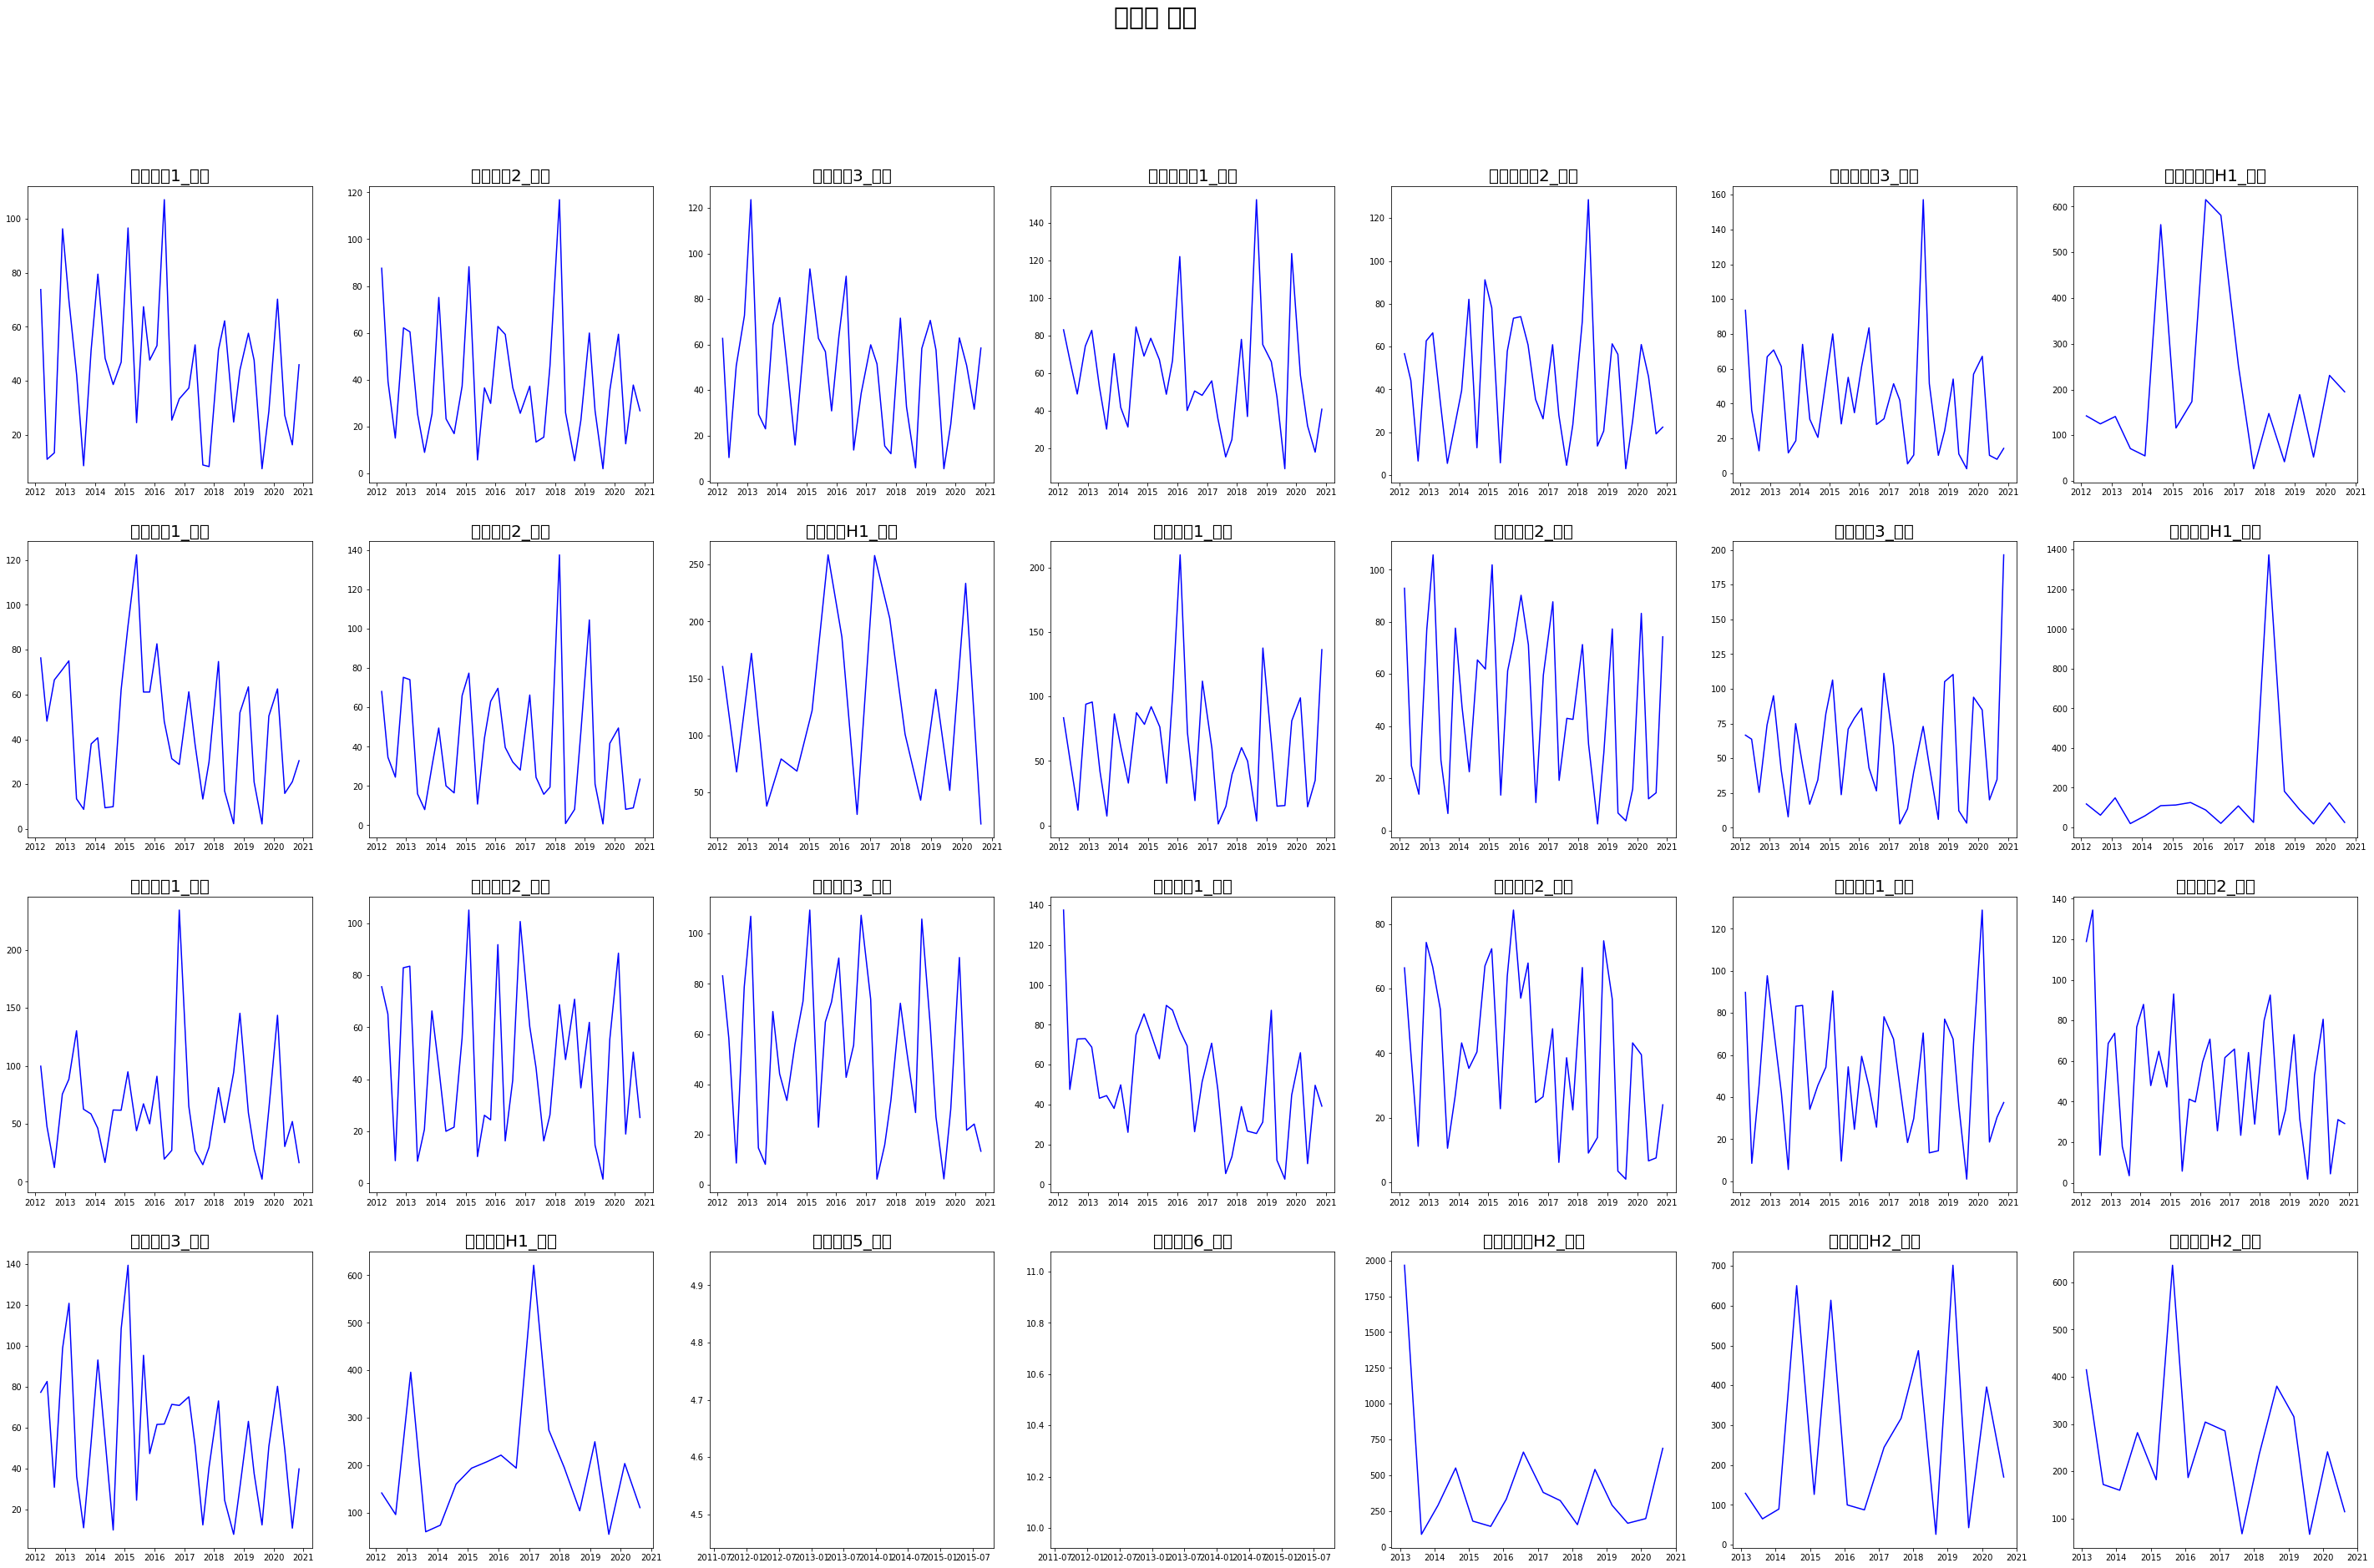

In [141]:
# 제주지역 station만 추출(위도 값 이용)
# 33.078411 < x < 33.620761

columns_temp = []

for i in range(len(df_raw)) :
    
    if 33.078411 < df_raw["Latitude [degrees_north]"].iloc[i] < 33.620761 :
        columns_temp.append(i)

df_jeju_raw = df_raw.iloc[columns_temp]
df_jeju_raw.reset_index(drop = True, inplace = True)

jeju_names1 = [[],[],[],[]]
jeju_names1[0] = ['대정연안1_연안', '대정연안2_연안', '대정연안3_연안', '서귀포연안1_연안', '서귀포연안2_연안', '서귀포연안3_연안', '서귀포연안H1_항만']
jeju_names1[1] = ['성산연안1_연안', '성산연안2_연안', '성산연안H1_항만', '제주연안1_연안', '제주연안2_연안', '제주연안3_연안', '제주연안H1_항만']
jeju_names1[2] = ['조천연안1_연안', '조천연안2_연안', '조천연안3_연안', '표선연안1_연안', '표선연안2_연안', '한림연안1_연안', '한림연안2_연안']
jeju_names1[3] = ['한림연안3_연안', '한림연안H1_항만', '남해서부5_근해', '남해서부6_근해', '서귀포연안H2_항만', '제주연안H2_항만', '한림연안H2_항만']

# type 변경
df_jeju_raw = df_jeju_raw.astype({"yyyy-mm-dd hh:mm:ss" : "str"})
# df_jeju_raw["yyyy-mm-dd hh:mm:ss"] = df_jeju_raw["yyyy-mm-dd hh:mm:ss"].iloc[:10]

for i in range(len(df_jeju_raw)) :
    
    df_jeju_raw["yyyy-mm-dd hh:mm:ss"].iloc[i] = df_jeju_raw["yyyy-mm-dd hh:mm:ss"].iloc[i][:10]
    
df_jeju_raw = df_jeju_raw = df_jeju_raw.astype({"yyyy-mm-dd hh:mm:ss" : "datetime64"})

# raw 데이터에 대한 분포도

fig, ax = plt.subplots(nrows = 4, ncols = 7, figsize = (50, 30))

for i in range(4) :
    for j in range(7) :
        ax[i][j].plot(df_jeju_raw[df_jeju_raw["station"] == jeju_names1[i][j]]['yyyy-mm-dd hh:mm:ss'],
                 df_jeju_raw[df_jeju_raw["station"] == jeju_names1[i][j]]['용존무기질소[μg/L]'], color = "b")
        ax[i][j].set_title(jeju_names1[i][j], fontsize = 20)
    
plt.suptitle("지점별 분포", fontsize=30)
plt.show()